# Classification Tree 

In [1]:
# import required packages
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import sample date
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/M_Signups/sample_data_classification.csv"
sample_data = pd.read_csv(data_path)
print(sample_data.shape)
sample_data.head()

(100, 4)


,output,input1,input2,input3
0,1,534,536,466
1,0,264,103,244
2,0,272,339,609
3,1,416,444,330
4,1,520,464,104


In [3]:
# Split data into input and putput objects
X = sample_data.drop(['output'], axis=1)
Y = sample_data['output']
print(X.shape)
X.head()

(100, 3)


,input1,input2,input3
0,534,536,466
1,264,103,244
2,272,339,609
3,416,444,330
4,520,464,104


In [4]:
print(Y.shape)
Y.head()

(100,)


0    1
1    0
2    0
3    1
4    1
Name: output, dtype: int64

In [5]:
# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42,
                                                    stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train.head()

(80, 3)
(20, 3)
(80,)
(20,)


,input1,input2,input3
66,339,314,235
62,516,594,385
44,551,628,486
9,574,611,182
26,486,459,204


In [6]:
# instantiate our model object
clf = DecisionTreeClassifier(random_state=42,min_samples_leaf=7) # default settings

In [7]:
# train our model
clf.fit(x_train,y_train)
print(clf)

DecisionTreeClassifier(min_samples_leaf=7, random_state=42)


In [8]:
# assess model accuracy
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.85

In [9]:
# demonstration of over fitting
# decision trees are prone to this
# see how well our predicted model fits to the trained data

# assess model accuracy
y_pred_training = clf.predict(x_train)
accuracy_score(y_train,y_pred_training)
# with that split of 7 it means the model isn perfectly learning
# the rulles otherwise it would be 100%

0.8625

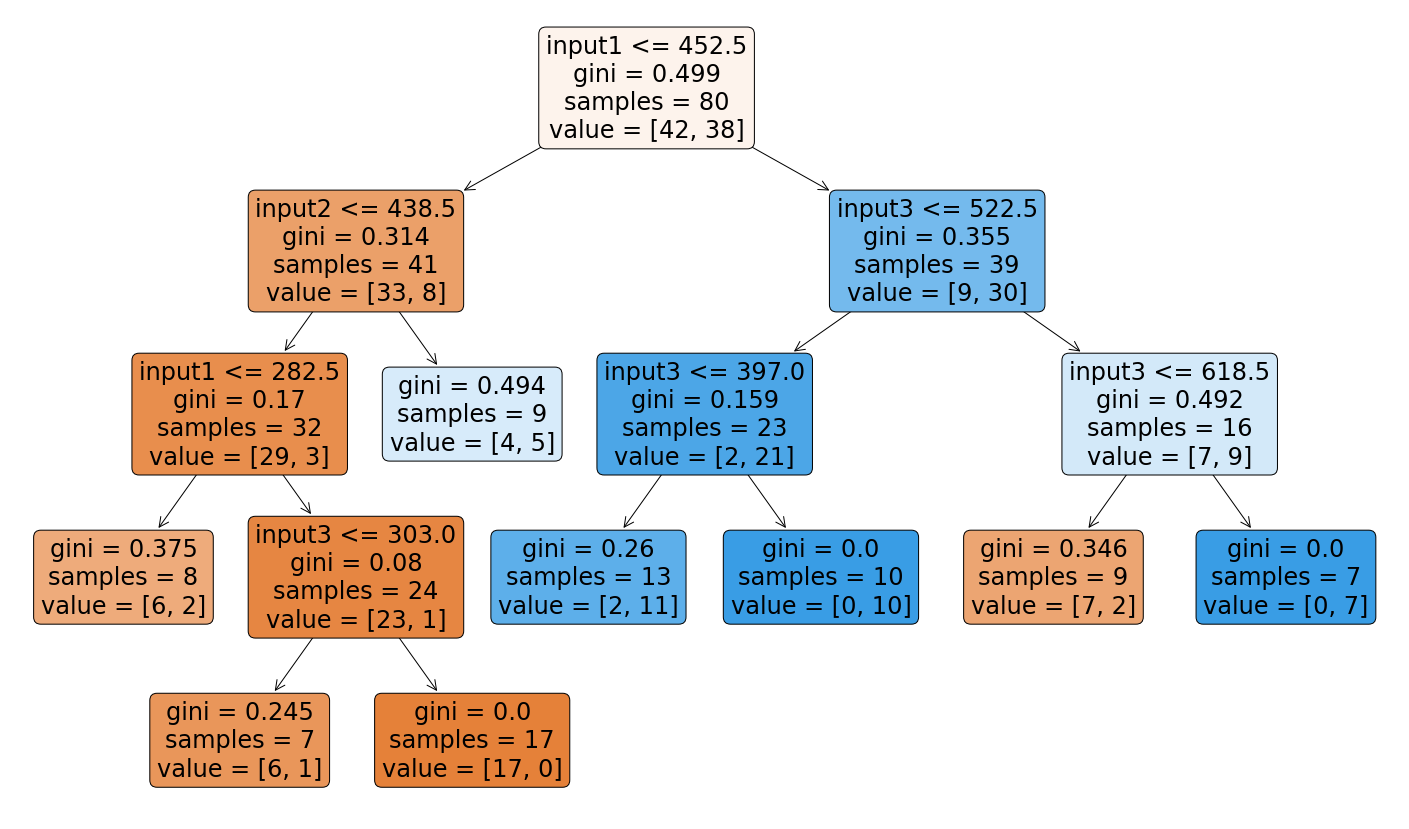

In [10]:
# plot our decision tree
plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                 feature_names=X.columns,
                 filled=True,
                 rounded = True,
                 fontsize=24)
# literally example of overfitting
# second line is gini, impurity score to determine which split point
# is best each time 